In [1]:
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [2]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

In [3]:
# ignorando alertas (não erros)

import warnings
warnings.filterwarnings('ignore')

In [4]:
# importando o dataset
df = pd.read_csv('dataset/data-set-clube-new.csv', sep=';')

In [5]:
# checando as 3 primeiras linhas do dataset
df.head(3)

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
0,54486,ATIVO,0,0,0,0
1,54460,ATIVO,0,0,0,0
2,54462,ATIVO,0,0,0,0


In [6]:
# checando as 3 últimas linhas do dataset
df.tail(3)

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
11985,55648,ATIVO,0,0,0,0
11986,55789,ATIVO,0,0,0,0
11987,49255,ATIVO,0,8,4,4


In [7]:
# quantidade de linhas e colunas do dataset
print(df.shape)

(11988, 6)


In [8]:
# conferindo se existe valor nulo no dataset
df.isnull().values.any()

False

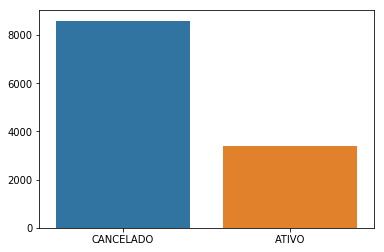

In [9]:
status = df["status"].value_counts()
sns.barplot(status.index, status.values)

In [11]:
# Após a analise do gráfico acima, podemos ver que a maioria do dataset tem o "status" cancelado.

status_ativo = df["status"][df["status"] == "ATIVO"]
print("Porcentagem de Status = "+str((status_ativo.shape[0] / df["status"].shape[0]) * 100))

Porcentagem de Status = 28.269936603269937


In [12]:
df.describe()

,id_socio,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
count,11988.000000,11988.000000,11988.000000,11988.000000,11988.000000
mean,22757.953537,4.804721,1.241408,0.920921,4.672589
std,12431.713232,8.342815,4.194899,3.408348,23.466164
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,11348.750000,0.000000,0.000000,0.000000,0.000000
50%,23014.500000,0.000000,0.000000,0.000000,0.000000
75%,32053.250000,12.000000,0.000000,0.000000,0.000000
max,56508.000000,62.000000,53.000000,39.000000,490.000000


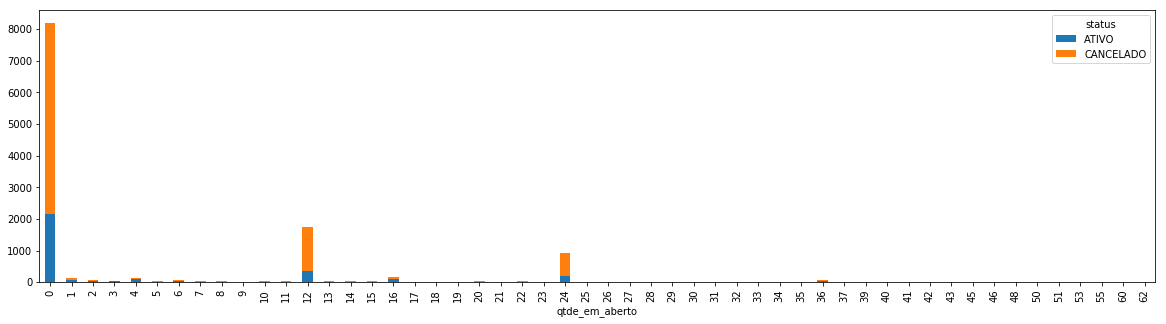

In [13]:
# Relação das variáveis status e parcelas em aberto
# Podemos analisar que a maior parte dos cancelamentos não tinham parcelas em aberto.


df.groupby(["qtde_em_aberto", "status"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,5))